__Grids__

In this example, we'll create grids of Cartesian (y,x) coordinates, representing the arc-second coordinate grid of an observed data-set (e.g. ccd imaging).

In [1]:
from autolens.array import grids
from autolens.plotters import grid_plotters

In PyAutoLens, a grid is a set of two-dimensional (y,x) coordinates (in arc-seconds) that are deflected and traced by a strong lensing system.

This coordinate grid is aligned with the image we analyze, such that each coordinate on a  grid maps to the centre of each image-pixel. Lets make a grid using 100 x 100 pixels, with a pixel scale (arcsecond-to-pixel conversion factor) of 0.05", giving us a a 5" x 5" grid.

In [2]:
grid = grids.Grid.from_shape_pixel_scale_and_sub_grid_size(
    shape=(100, 100), pixel_scale=0.05
)

First, lets plot this grid, which shows that it is a fairly bland uniform grid of dots.

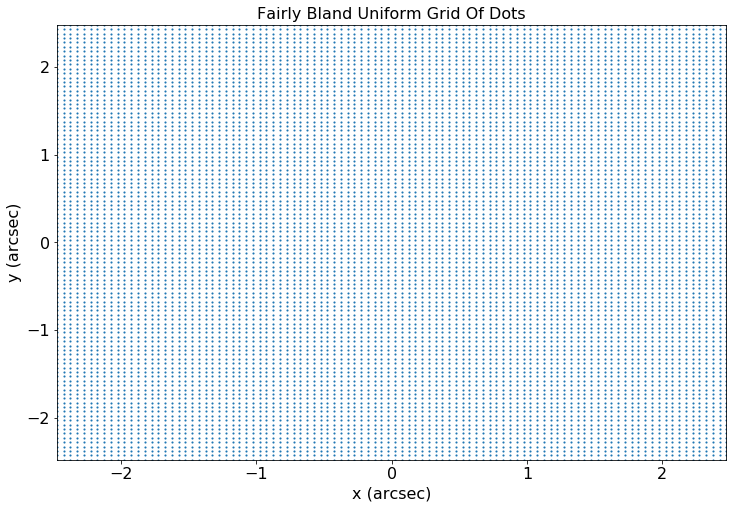

In [3]:
grid_plotters.plot_grid(grid=grid, title="Fairly Bland Uniform Grid Of Dots")

We can print each coordinate of this grid, revealing that it consists of a set of arc-second coordinates (where the spacing between each coordinate corresponds to the 'pixel_scale' of 0.05" defined above)

In [4]:
print("(y,x) pixel 0:")
print(grid[0])
print("(y,x) pixel 1:")
print(grid[1])
print("(y,x) pixel 2:")
print(grid[2])
print("(y,x) pixel 100:")
print(grid[100])
print("etc.")

(y,x) pixel 0:
[ 2.475 -2.475]
(y,x) pixel 1:
[ 2.475 -2.425]
(y,x) pixel 2:
[ 2.475 -2.375]
(y,x) pixel 100:
[ 2.425 -2.475]
etc.


(PyAutoLens flattens the NumPy array to 1D to save memory, however it consists of all 10000 pixel coordinates on our 2D grid)

In [5]:
print(grid.shape)

(10000, 2)


A grid can be created with a sub-grid, which splits each pixel on the grid into sub-pixel of size (sub_grid_size x sub_grid_size) and which are used to perform calculations more accurately:

In [6]:
grid = grids.Grid.from_shape_pixel_scale_and_sub_grid_size(
    shape=(100, 100), pixel_scale=0.05, sub_grid_size=2
)

We specified a sub_grid_size of 2 above, therefore we expect 4 (2 x 2) times more sub-pixels than pixels (which like the grid are again flattened to 1D).

In [7]:
print(grid.shape)

(40000, 2)


The first four pixels of our sub-grid correspond to the first four sub-pixels, which form a sub-grid inside the
first grid pixel, as follows:

In [8]:
# pixel 1:
#              _________
#              |         |
#              |         |  o = (y,x) centre of 
# y = 2.475"   |    o    |       grid coordinate.
#              |         |
#              |_________|
#              x = -2.475

# Sub-pixels 1, 2, 3 & 4:
#               _________
#              |         |
#              |  o   o  |  o = (y,x) centre of sub-
# y = 2.475"   |         |       grid coordinates.
#              |  o   o  |
#              |_________|
#              x = -2.475

# The sub-pixels coordinate are spaced uniformly between the pixel's edges
# (which are at y = (2.45", 2.5") and x = (-2.5". -2.45") )

In [9]:
print("(y,x) sub-pixel 0 (of pixel 0):")
print(grid[0])
print("(y,x) sub-pixel 1 (of pixel 0):")
print(grid[1])
print("(y,x) sub-pixel 2 (of pixel 0):")
print(grid[2])
print("(y,x) sub-pixel 3 (of pixel 0):")
print(grid[3])

(y,x) sub-pixel 0 (of pixel 0):
[ 2.4875 -2.4875]
(y,x) sub-pixel 1 (of pixel 0):
[ 2.4875 -2.4625]
(y,x) sub-pixel 2 (of pixel 0):
[ 2.4625 -2.4875]
(y,x) sub-pixel 3 (of pixel 0):
[ 2.4625 -2.4625]


The sub-grid then continues on to the next grid pixels (and so on)

In [10]:
print("(y,x) sub-pixel 0 (of pixel 1):")
print(grid[4])
print("(y,x) sub-pixel 0 (of pixel 1):")
print(grid[5])
print("etc.")

(y,x) sub-pixel 0 (of pixel 1):
[ 2.4875 -2.4375]
(y,x) sub-pixel 0 (of pixel 1):
[ 2.4875 -2.4125]
etc.


Congratulations, you've completed your first PyAutoLens tutorial! Before moving on to the next one, experiment with PyAutoLens by doing the following:

1) Change the pixel-scale of the grids - what happens to the Cartesian coordinates?
2) Change the resolution of the grids - what happens Cartesian coordinates?
3) Change the sub-grid size - what do you note about the pixel-scale of sub pixels?